<img style="float: left; margin: 30px 15px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg" width="300" height="500" /> 
    
    
### Simulación de procesos financieros. 

**Nombres:** `[Jesús Guillermo Sainz Zárate, Alejandro Frizard Aguilar]`

**Fecha:** 04 de marzo del 2024.

**Expediente** : `[7530501, 739647]`.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/GuillermoSainz07/ProyectoConjunto_FAAlejandro_JGSainz

# Tarea 5: Clase 10


# Tarea 
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
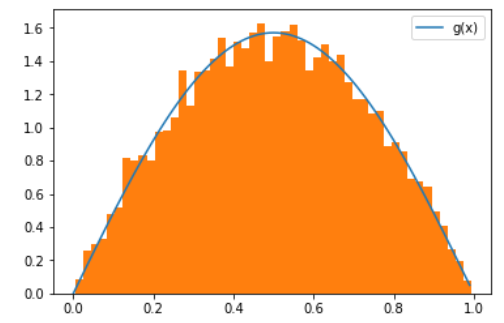

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
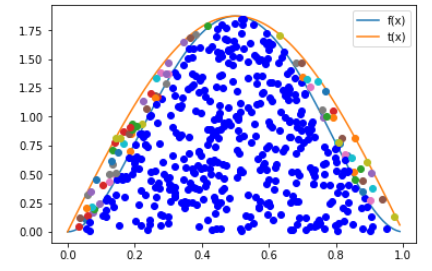

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

8. Demostrar la validez de la siguiente ecuación
$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i$$

9. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    

Demuestre matemáticamente que 
 $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
 y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.
> **Ayuda**: $
\begin{aligned}
\frac{p_{k+1}}{p_k}& = \frac{e^{-\lambda}(\lambda)^k}{k!} \\
& = \frac{e^{-\lambda}(\lambda)^k}{k!}
\end{aligned}
$

**Alumno 1 GS:**

**Soluciones (texto)**

In [2]:
# Solucion codigo

**Alumnos 2 FA:**

**Soluciones (texto)**

### 1

In [17]:
# Solucion codigo
import numpy as np
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

def acep_rech(R2:'Variables distribuidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función mayor a f'):

    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    x = [R1[i] for i in range(len(R1)) if condition[i]]
    return x

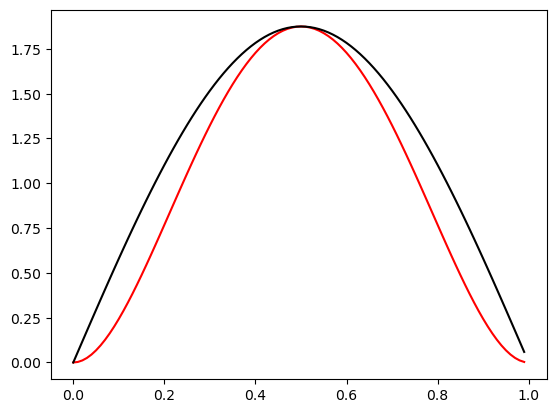

In [18]:
N = 200000 # número de puntos a simular
R2 = np.random.rand(N)
R1 = np.random.rand(N)

f = lambda x: 30*((x**2)-(2*x**3)+(x**4))
a = f(optimize.fmin(lambda x: -f(x),0, disp=False))
t = lambda x: a*np.sin(np.pi * x)

x = np.arange(0,1,0.01)

plt.plot(x,f(x),'r')
plt.plot(x,t(x),'k')

x = acep_rech(R2, R1, f, t)

### 2


$$ g(x) = \frac{t(x)}{c} $$

$$ a \int_{0}^{1}\sin (\pi x)dx $$

$$ \frac{a}{\pi}[-\cos(\pi x)]_{1}^{0} = \frac{2a}{\pi} $$

$$ g(x) = \frac{t(x)}{c}  = \frac{a\sin(\pi x)}{\frac{2a}{\pi}} = \frac{1}{2}\pi \sin(\pi x)$$

### 3

$$ G(x) = \int_{0}^{x}\frac{\pi}{2}\sin(\pi x)dx = \frac{1}{2}[-\cos(\pi x)]_{0}^{x} $$

$$ -\frac{1}{2}\cos(\pi x) + \frac{1}{2} $$

$$ U = \frac{1}{2}(-\cos(\pi x) + 1) $$

$$ 2U = -\cos(\pi x) + 1 $$

$$ 2U - 1 = -\cos(\pi x) $$

$$ -cos^{-1}(2U - 1) = \pi x $$

$$ \frac{1}{\pi}(-cos^{-1}(2U - 1)) = x $$

$$ x = \frac{1}{\pi}cos^{-1}(1 - 2U) $$

### 4

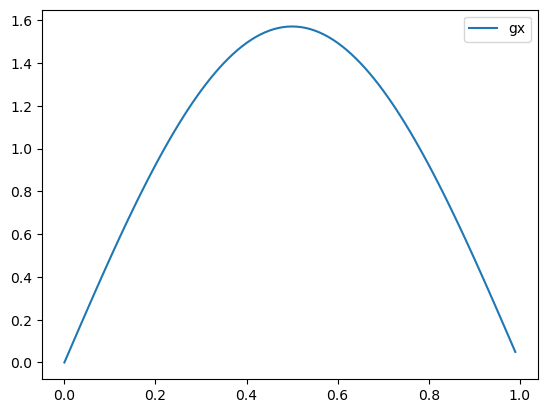

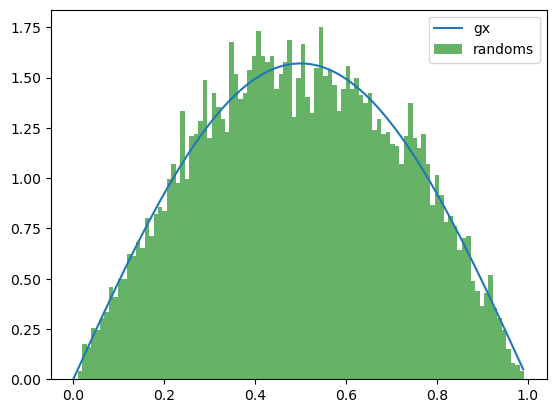

In [19]:
x = np.arange(0,1,0.01)
gx = (np.pi / 2) * (np.sin(np.pi * x))

plt.figure()
plt.plot(x, gx, label = "gx")
plt.legend()
plt.show()

def funcion(n):
    u = np.random.rand(n)
    return (1 / np.pi) * (np.arccos(1 - 2*u))
    
f = funcion(10000)

plt.figure()
plt.plot(x, gx, label = 'gx')
plt.hist(f, bins = 100, density = True, color = 'green', alpha = 0.6, label = 'randoms')
plt.legend()
plt.show()

### 5

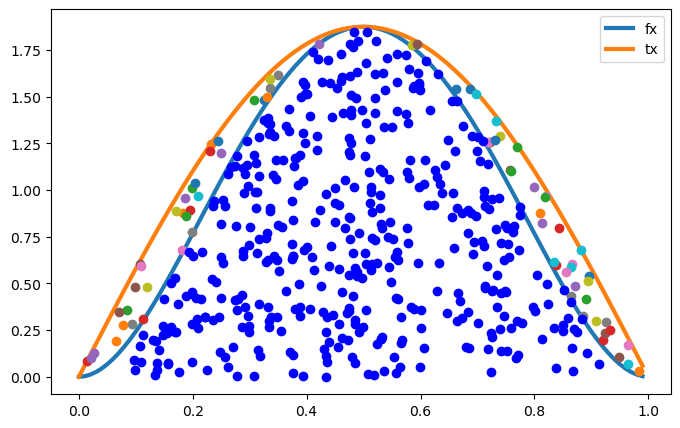

In [23]:
x = np.arange(0,1,0.01)

plt.figure(figsize = (8, 5))
plt.plot(x, f(x), label = "fx", lw = 3)
plt.plot(x, t(x),label="tx", lw = 3)
plt.legend()
valores_aleatorios1 = acep_rech(np.random.rand(500), funcion(500), f, t)
plt.show()

### 6

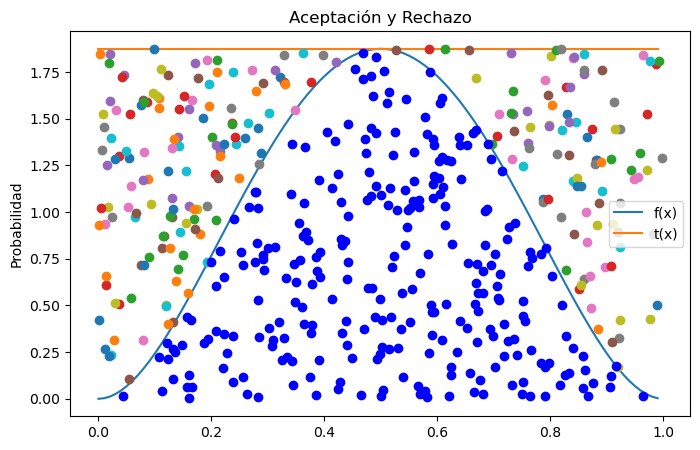

Porcentaje de puntos de aceptación t(x) constante: 54.0 %
Porcentaje de puntos de aceptación t(x) senoidal: 85.2 %


In [25]:
t = lambda x: a * np.ones(len(x))
x = np.arange(0, 1, 0.01)

plt.figure(figsize = (8, 5))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.title('Aceptación y Rechazo')
plt.ylabel('Probabilidad')
plt.legend()

n = 500
R2 = np.random.rand(n)
R1 = np.random.rand(n)

valores_aleatorios2 = acep_rech(R2, R1, f, t)

plt.show()

senoidal = len(valores_aleatorios1) / n
constante = len(valores_aleatorios2) / n

print('Porcentaje de puntos de aceptación t(x) constante:', constante * 100, '%')
print('Porcentaje de puntos de aceptación t(x) senoidal:', senoidal * 100, '%')

### 7

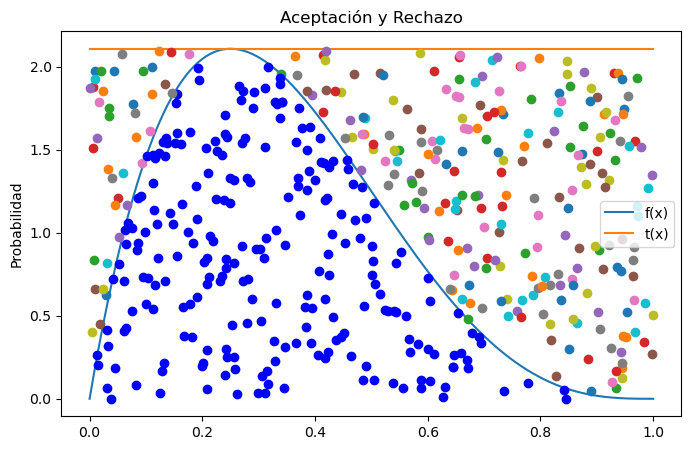

In [27]:
f = lambda x: 20 * x * (1 - x)**3
x = np.linspace(0, 1, 1000)

max_f = f(optimize.fmin(lambda x:-f(x), 0, disp = False))
t = lambda x: max_f * np.ones(len(x))

plt.figure(figsize = (8, 5))
plt.plot(x, f(x), label='f(x)')
plt.plot(x, t(x), label='t(x)')
plt.title('Aceptación y Rechazo')
plt.ylabel('Probabilidad')
plt.legend()

acep_rech(np.random.rand(500), np.random.rand(500), f, t);

### 8

In [31]:
def calcular_pi(n, p):
    pi = [0] * (n + 1)
    pi[0] = 1

    for i in range(n):
        pi[i + 1] = ((n - i) / (i + 1)) * (p / (1 - p)) * pi[i]
    return pi

n_pasos = 10  # Número de pasos para calcular
probabilidad_p = 0.5  # Probabilidad p

valores_pi = calcular_pi(n_pasos, probabilidad_p)
print("Valores de pi para los primeros", n_pasos, "pasos:")
for i, valor in enumerate(valores_pi):
    print(f"p_{i}: {valor}")


Valores de pi para los primeros 10 pasos:
p_0: 1
p_1: 10.0
p_2: 45.0
p_3: 120.0
p_4: 210.0
p_5: 252.0
p_6: 210.0
p_7: 120.0
p_8: 45.0
p_9: 10.0
p_10: 1.0


### 9

In [32]:
import numpy as np
import math

def poisson(lam, size):
    # Generar variables aleatorias Poisson
    poisson_values = []
    for _ in range(size):
        k = 0
        p = np.random.uniform()
        p_accum = math.exp(-lam)
        while p > p_accum:
            k += 1
            p_accum += (lam / (k + 1)) * p_accum
        poisson_values.append(k)
    return poisson_values

# Parámetros
lam = 3  
size = 1000 

# Generar variables aleatorias Poisson
poisson_samples = poisson(lam, size)
print("Algunos valores de la muestra Poisson:")
print(poisson_samples[:10])  # Imprimir los primeros 10 valores


Algunos valores de la muestra Poisson:
[1, 4, 4, 3, 4, 2, 3, 3, 0, 0]
